In [1]:
from rdkit.Chem import PandasTools
import pandas as pd
import numpy as np
pd.options.display.max_columns = 30
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover


In [2]:
df_sdf_384 = PandasTools.LoadSDF("CysteinFovalentInhibitor-3350cpds_384w.sdf")

[14:19:09]  deprecated group abbreviation ignored on line 33820
[14:19:09]  deprecated group abbreviation ignored on line 34289
[14:19:09]  deprecated group abbreviation ignored on line 34618
[14:19:09]  deprecated group abbreviation ignored on line 34789
[14:19:09]  deprecated group abbreviation ignored on line 34958
[14:19:09]  deprecated group abbreviation ignored on line 36437
[14:19:09]  deprecated group abbreviation ignored on line 36602
[14:19:09]  deprecated group abbreviation ignored on line 36780
[14:19:09]  deprecated group abbreviation ignored on line 37276
[14:19:09]  deprecated group abbreviation ignored on line 37444
[14:19:09]  deprecated group abbreviation ignored on line 37612
[14:19:09]  deprecated group abbreviation ignored on line 39070


,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol
0,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,
1,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,
2,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,
3,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,
4,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,
...,...,...,...,...,...,...,...,...,...
3345,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,
3346,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,
3347,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,
3348,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,

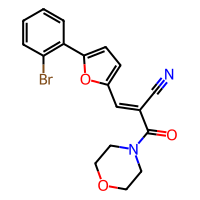
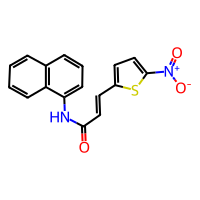
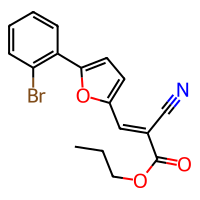
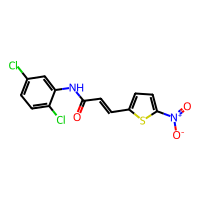
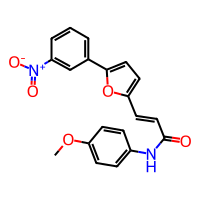
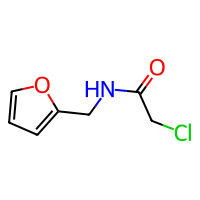
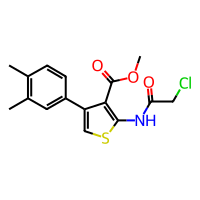
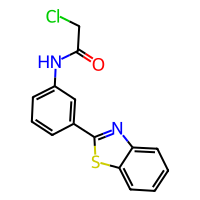
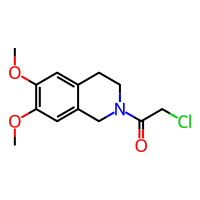
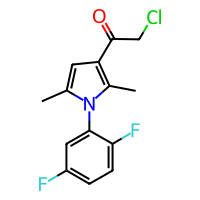

In [3]:
df_sdf_384

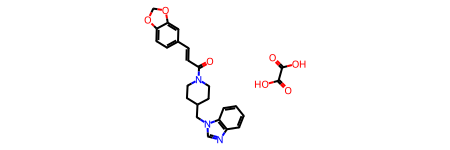

In [4]:
# 挑选一个化合物去盐前
mol = df_sdf_384.iloc[2535]["ROMol"]
PandasTools.RenderImagesInAllDataFrames(images=True)
mol


,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol
0,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,
1,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,
2,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,
3,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,
4,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,
...,...,...,...,...,...,...,...,...,...
3345,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,
3346,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,
3347,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,
3348,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,

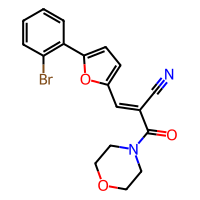
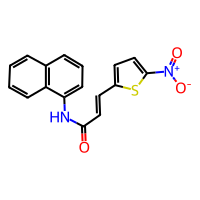
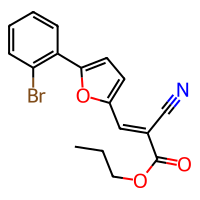
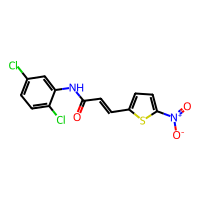
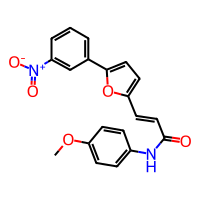
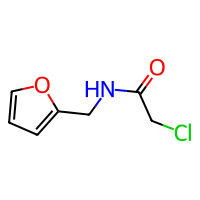
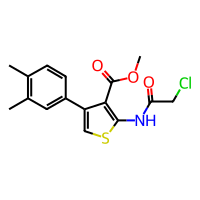
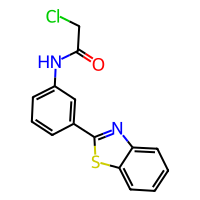
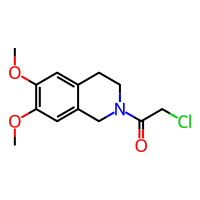
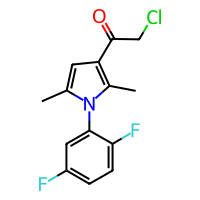

In [5]:
# 创建 SaltRemover 对象
remover = SaltRemover()

# 定义去盐函数
def remove_salt(mol):
    if mol is not None:
        return remover.StripMol(mol)
    else:
        return None

# 在 df_sdf_384  的 ROMol 列上应用去盐函数
df_sdf_384['ROMol'] = df_sdf_384['ROMol'].apply(remove_salt)

# 打印处理后的 DataFrame
df_sdf_384 

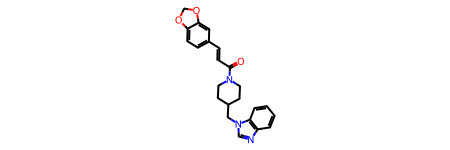

In [6]:
# 挑选一个化合物去盐后
mol = df_sdf_384.iloc[2535]["ROMol"]
PandasTools.RenderImagesInAllDataFrames(images=True)
mol


,Custom_Parent_ID,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,
...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,

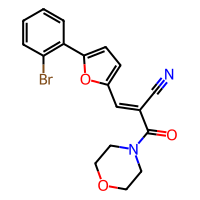
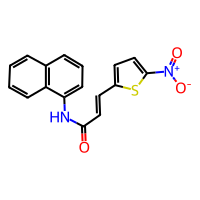
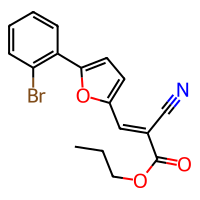
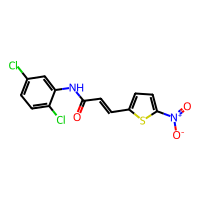
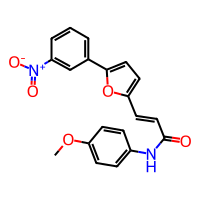
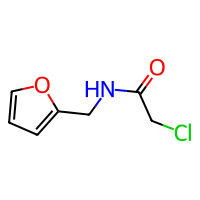
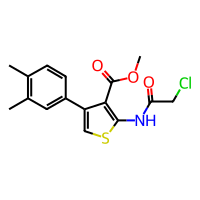
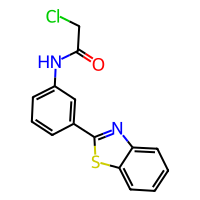
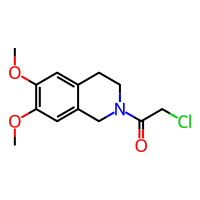
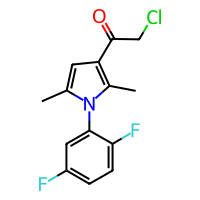

In [7]:
# add new field/column: Custom_Parent_ID >>> df_sdf_384

new_list = []
for i in range(620283, 620283+len(df_sdf_384)):
    new_i = "STR-" + str("%0.7d" % i)
    new_list.append(new_i)
new_dic = {"Custom_Parent_ID": new_list}
id_col = pd.DataFrame(new_dic)

df_sdf_384_new = pd.concat([id_col, df_sdf_384], axis=1, sort=False, join='outer')
df_sdf_384_new

In [8]:
# To make a new filed: 'Row384 + Col384'. Firstly we need get the col and row
col_list = list(df_sdf_384['Col384'])
new_col_list = [i.lstrip('0') for i in col_list]

print(len(new_col_list))
print(new_col_list)


3350
['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '14', '14', '14', '1

In [9]:
# secondly add this "New_Col" to dataframe

new_col_dic = {"New_Col": new_col_list}
id_new_col = pd.DataFrame(new_col_dic)

,Custom_Parent_ID,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol,New_Col
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,,3
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,,3
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,,3
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,,3
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,,3
...,...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,,21
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,,21
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,,21
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,,21

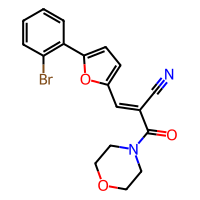
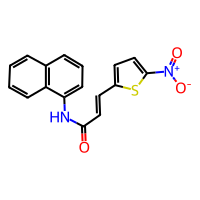
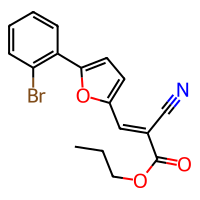
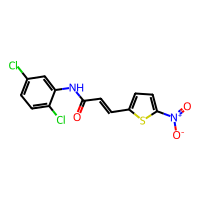
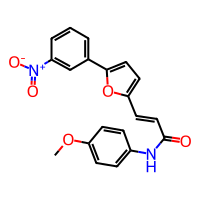
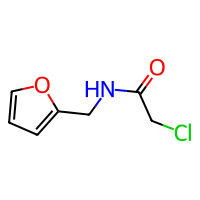
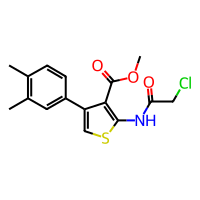
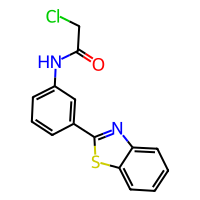
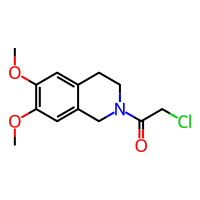
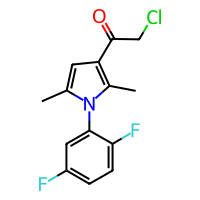

In [10]:
df_sdf_384_update = pd.concat([df_sdf_384_new, id_new_col], axis=1, sort=False, join='outer')
df_sdf_384_update

,Custom_Parent_ID,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol,New_Col,Original_Well
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,,3,A3
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,,3,B3
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,,3,C3
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,,3,D3
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,,3,E3
...,...,...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,,21,G21
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,,21,I21
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,,21,K21
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,,21,M21

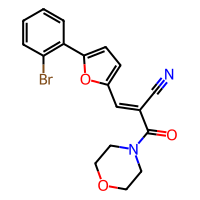
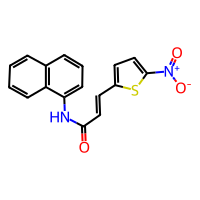
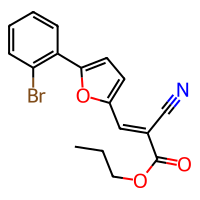
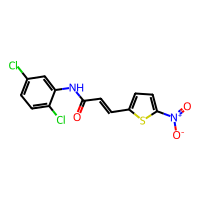
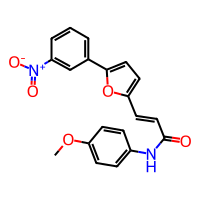
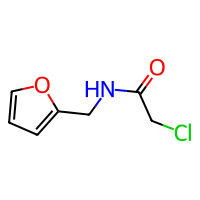
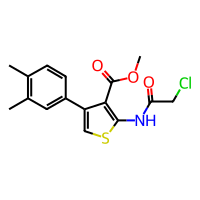
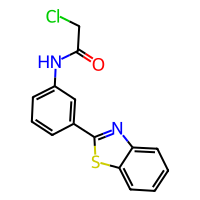
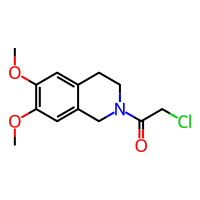
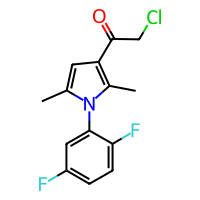

In [11]:
# make a new filed called "Original_Well" to combine "Row" and "New_Col"

df_sdf_384_update["Original_Well"] = df_sdf_384_update["Row384"] + df_sdf_384_update["New_Col"]

df_sdf_384_update

,Custom_Parent_ID,IDNUMBER,Plt384,Row384,Col384,SALTDATA,MW-wsalts,MWwosalts,ID,ROMol,New_Col,Original_Well,Vendor,Notes,Custom Category
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,,3,A3,MCE,Plate PLATE 001 A3,diversity
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,,3,B3,MCE,Plate PLATE 001 B3,diversity
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,,3,C3,MCE,Plate PLATE 001 C3,diversity
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,,3,D3,MCE,Plate PLATE 001 D3,diversity
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,,3,E3,MCE,Plate PLATE 001 E3,diversity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,,21,G21,MCE,Plate PLATE 011 G21,diversity
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,,21,I21,MCE,Plate PLATE 011 I21,diversity
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,,21,K21,MCE,Plate PLATE 011 K21,diversity
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,,21,M21,MCE,Plate PLATE 011 M21,diversity

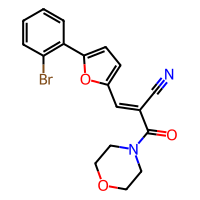
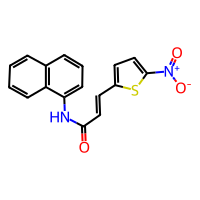
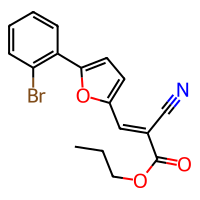
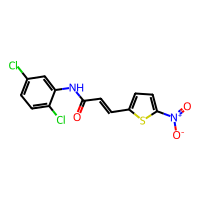
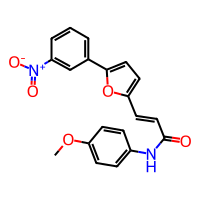
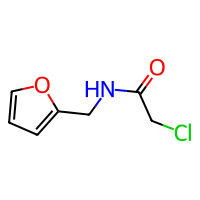
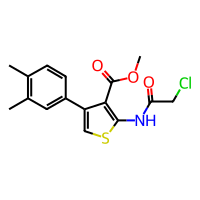
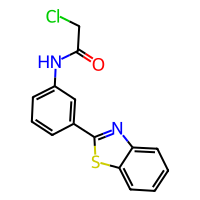
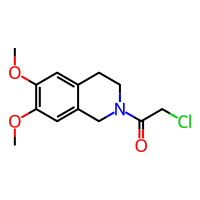
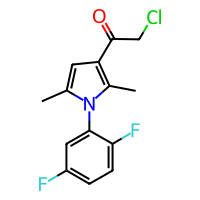

In [12]:

# Add "Vendor" and "Notes" in dataframe

df_sdf_384_update["Vendor"] = "MCE"

df_sdf_384_update["Notes"] = "Plate " + df_sdf_384_update["Plt384"] + " " + \
                                   df_sdf_384_update["Original_Well"]

df_sdf_384_update["Custom Category"] = "diversity"
df_sdf_384_update





,Custom_Parent_ID,Vendor_CN,Original_Plate,Row,Col,Salt_Status,MWONE,MWBASE,ID,ROMol,New_Col,Original_Well,Vendor,Notes,Custom Category
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,,3,A3,MCE,Plate PLATE 001 A3,diversity
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,,3,B3,MCE,Plate PLATE 001 B3,diversity
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,,3,C3,MCE,Plate PLATE 001 C3,diversity
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,,3,D3,MCE,Plate PLATE 001 D3,diversity
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,,3,E3,MCE,Plate PLATE 001 E3,diversity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,,21,G21,MCE,Plate PLATE 011 G21,diversity
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,,21,I21,MCE,Plate PLATE 011 I21,diversity
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,,21,K21,MCE,Plate PLATE 011 K21,diversity
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,,21,M21,MCE,Plate PLATE 011 M21,diversity

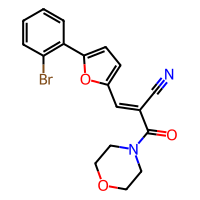
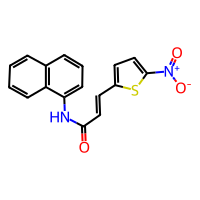
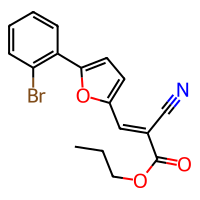
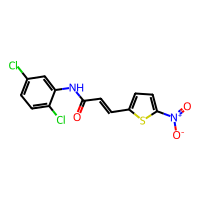
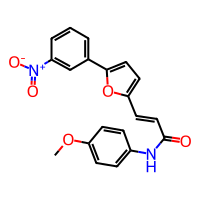
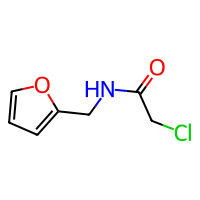
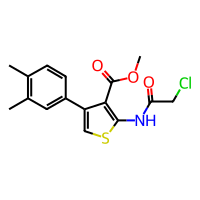
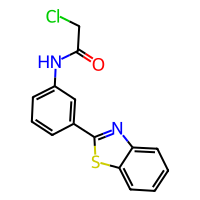
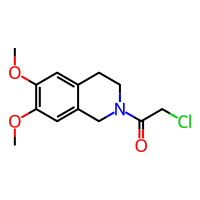
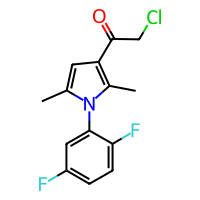

In [13]:
name_dic = {"IDNUMBER": "Vendor_CN", "Plt384": "Original_Plate", "SALTDATA": "Salt_Status", "MW-wsalts": "MWONE", "MWwosalts":"MWBASE", "Row384":"Row", "Col384":"Col",  }

df_sdf_384_update.rename(columns=name_dic, inplace=True)

df_sdf_384_update

In [14]:
# Add new field called "Custom Category" ("diversity" as its content) into each file

file_path = "output384.sdf"
    
PandasTools.WriteSDF(df_sdf_384_update, file_path, molColName="ROMol", properties=list(df_sdf_384_update.columns))


,Custom_Parent_ID,Vendor_CN,Original_Plate,Row,Col,Salt_Status,MWONE,MWBASE,ID,New_Col,Original_Well,Vendor,Notes,Custom Category,ROMol
0,STR-0620283,F0007-1171,PLATE 001,A,03,freebase,"387,2","387,2",,3,A3,MCE,Plate PLATE 001 A3,diversity,
1,STR-0620284,F0447-0087,PLATE 001,B,03,freebase,"324,4","324,4",,3,B3,MCE,Plate PLATE 001 B3,diversity,
2,STR-0620285,F0007-1178,PLATE 001,C,03,freebase,"360,2","360,2",,3,C3,MCE,Plate PLATE 001 C3,diversity,
3,STR-0620286,F0447-0092,PLATE 001,D,03,freebase,"343,2","343,2",,3,D3,MCE,Plate PLATE 001 D3,diversity,
4,STR-0620287,F0007-1192,PLATE 001,E,03,freebase,"364,4","364,4",,3,E3,MCE,Plate PLATE 001 E3,diversity,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,STR-0623628,F9995-0362,PLATE 011,G,21,freebase,"173,6","173,6",,21,G21,MCE,Plate PLATE 011 G21,diversity,
3346,STR-0623629,F9995-0388,PLATE 011,I,21,freebase,"337,8","337,8",,21,I21,MCE,Plate PLATE 011 I21,diversity,
3347,STR-0623630,F9995-0396,PLATE 011,K,21,freebase,"302,8","302,8",,21,K21,MCE,Plate PLATE 011 K21,diversity,
3348,STR-0623631,F9995-0412,PLATE 011,M,21,freebase,"269,7","269,7",,21,M21,MCE,Plate PLATE 011 M21,diversity,

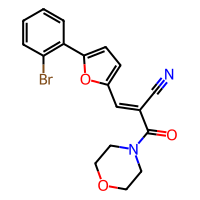
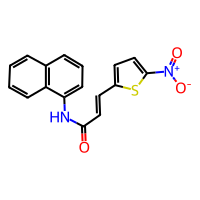
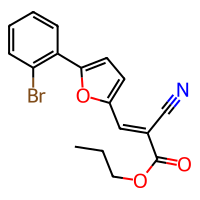
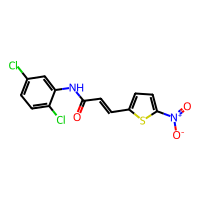
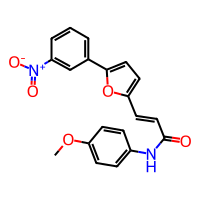
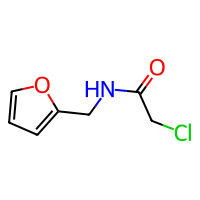
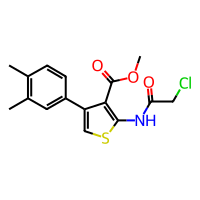
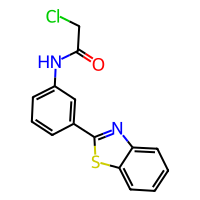
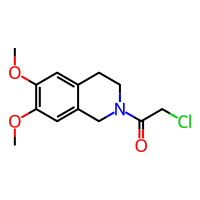
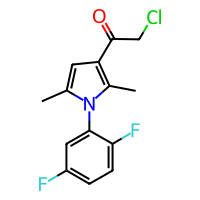

In [15]:
# Check output file
dataframe = PandasTools.LoadSDF("output384.sdf")
dataframe

In [16]:
print(dataframe)

     Custom_Parent_ID   Vendor_CN Original_Plate Row Col Salt_Status  MWONE  \
0         STR-0620283  F0007-1171      PLATE 001   A  03    freebase  387,2   
1         STR-0620284  F0447-0087      PLATE 001   B  03    freebase  324,4   
2         STR-0620285  F0007-1178      PLATE 001   C  03    freebase  360,2   
3         STR-0620286  F0447-0092      PLATE 001   D  03    freebase  343,2   
4         STR-0620287  F0007-1192      PLATE 001   E  03    freebase  364,4   
...               ...         ...            ...  ..  ..         ...    ...   
3345      STR-0623628  F9995-0362      PLATE 011   G  21    freebase  173,6   
3346      STR-0623629  F9995-0388      PLATE 011   I  21    freebase  337,8   
3347      STR-0623630  F9995-0396      PLATE 011   K  21    freebase  302,8   
3348      STR-0623631  F9995-0412      PLATE 011   M  21    freebase  269,7   
3349      STR-0623632  F9995-0414      PLATE 011   O  21    freebase  283,7   

     MWBASE ID New_Col Original_Well Vendor        